In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

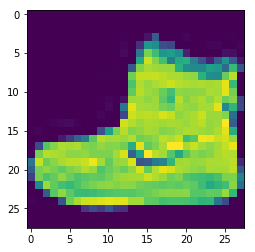

In [4]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [12]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5813

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [35]:
dim = 784

def step(comp):
    pca = PCA(n_components=comp)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
    X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, dim]))
    lr = LogisticRegression()
    lr.fit(X_train_lowdim, y_train[used_indices])
    return lr.predict(pca.transform(X_test.reshape([-1, dim])))
    
    
def get_accuracy(comp):
    accuracy = []
    for i in range(10):
        accuracy.append(accuracy_score(y_test, step(comp)))
    return np.mean(accuracy), np.var(accuracy)

In [36]:
main_comps = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
accuracy = []
variances = []

for comp in main_comps:
    mean, var = get_accuracy(comp)
    accuracy.append(mean)
    variances.append(var)

In [37]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

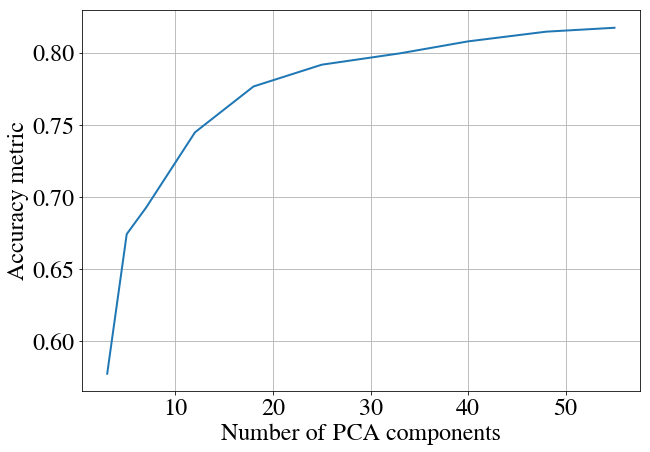

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(main_comps, accuracy)
plt.grid()
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy metric")
plt.show()


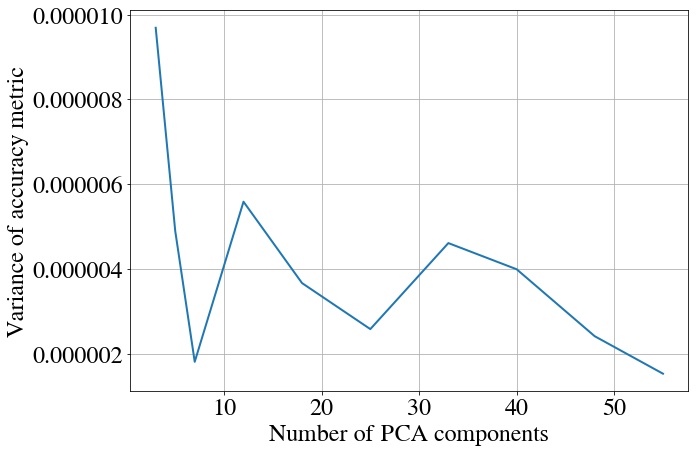

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(main_comps, variances)
plt.grid()
plt.xlabel("Number of PCA components")
plt.ylabel("Variance of accuracy metric")
plt.show()